# Query Analysis

In [1]:
# import necessary libraries
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import collections
import seaborn as sns

In [2]:
# file paths for the datasets
nist_qrel_file = 'qrels/2023.qrels.pass.withDupes.txt'
dl_2023_queries = "queries/dl-2023-queries.tsv"

In [3]:
nist_qrels = pd.read_csv(nist_qrel_file, sep=' ', header=None, names=['qid', 'Q0', 'docid', 'rel'])
queries_judged = set(nist_qrels['qid'])
real_queries_judged = [x for x in queries_judged if x < 3000000]
t5_queries_judged = [x for x in queries_judged if x > 3000000 and x < 3100000]
gpt4_queries_judged = [x for x in queries_judged if x > 3100000]

In [4]:
queries = pd.read_csv(dl_2023_queries, sep='\t', header=None, names=['qid', 'qtext'])

In [5]:
# getting real queries
real_queries = queries[queries['qid'].isin(real_queries_judged)]
synthetic_queries = queries[queries['qid'].isin(t5_queries_judged + gpt4_queries_judged)]

In [6]:
def get_query_length(queries):
    qlen_to_count = defaultdict(int)

    for eachline in queries.itertuples(index=True):
        qid, qtext = eachline.qid, eachline.qtext
        qlen = len(qtext.split(" "))
        qlen_to_count[qlen] += 1 
    return qlen_to_count

In [7]:
qlen_to_count_real = get_query_length(real_queries)
qlen_to_count_synthetic = get_query_length(synthetic_queries)

In [8]:
for qlen, qcount in qlen_to_count_real.items():
    precentage = round(qcount * 100 / sum(qlen_to_count_real.values()), 2)
    qlen_to_count_real[qlen] = precentage

In [9]:
for qlen, qcount in qlen_to_count_synthetic.items():
    precentage = round(qcount * 100 / sum(qlen_to_count_synthetic.values()), 2)
    qlen_to_count_synthetic[qlen] = precentage

In [10]:
qlen_to_count_real = sorted(qlen_to_count_real.items())
qlen_to_count_real

[(2, 5.19),
 (3, 1.3),
 (4, 14.85),
 (5, 14.18),
 (6, 19.61),
 (7, 12.04),
 (8, 8.03),
 (9, 1.27),
 (10, 1.27),
 (14, 1.28)]

In [11]:
qlen_to_count_synthetic = sorted(qlen_to_count_synthetic.items())
qlen_to_count_synthetic

[(4, 7.73),
 (5, 1.97),
 (6, 12.53),
 (7, 12.9),
 (8, 6.33),
 (9, 1.8),
 (10, 4.74),
 (11, 3.55),
 (12, 4.94),
 (13, 6.92),
 (15, 1.6)]

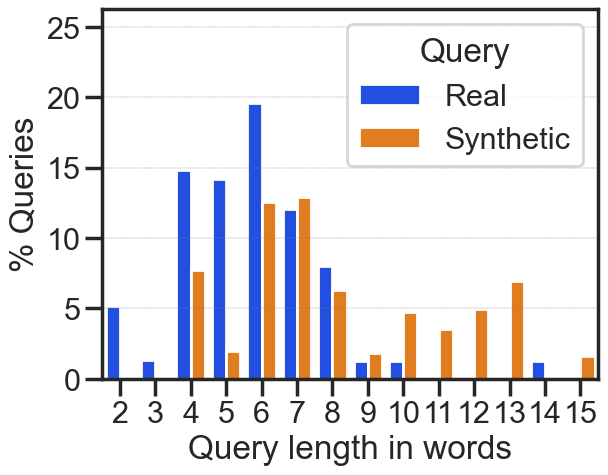

In [12]:
# Set the aesthetic style of the plots
sns.set_style("ticks")  # Options: white, dark, whitegrid, darkgrid, ticks
sns.set_context("poster")     # Options: paper, notebook, talk, poster
sns.set_palette("bright")   # You can also use: deep, muted, bright, dark, colorblind, or a custom list of colors

# Sample data
list1 = qlen_to_count_real
list2 = qlen_to_count_synthetic

# Convert lists to DataFrames
df1 = pd.DataFrame(list1, columns=['length', 'Real'])
df2 = pd.DataFrame(list2, columns=['length', 'Synthetic'])

# Merge the DataFrames on 'length'
df = pd.merge(df1, df2, on='length', how='outer').fillna(0)

# Convert counts to integers
df['Real'] = df['Real'].astype(float)
df['Synthetic'] = df['Synthetic'].astype(float)

# Melt the DataFrame for seaborn
df_melted = df.melt(id_vars='length', value_vars=['Real', 'Synthetic'], var_name='Query', value_name='count')

# Plotting
sns.barplot(x='length', y='count', hue='Query', data=df_melted)
plt.xlabel('Query length in words')
plt.ylabel('% Queries')
# plt.title('Query Length vs. Count')

# Adding dotted lines for y-values
y_values = [5, 10, 15, 20, 25]  # Example y-values for the dotted lines
for y in y_values:
    plt.axhline(y=y, color='gray', linestyle='--', linewidth=0.3)

plt.savefig("figs/query_length_precentage.pdf", bbox_inches="tight")

In [13]:
def get_token_count(queries):
    qtoken_to_count = defaultdict(int)

    for qtext in list(queries['qtext']):
        qtokens = qtext.split(" ")
        for qtoken in qtokens:
            qtoken_to_count[qtoken] += 1 
    return qtoken_to_count

In [14]:
qtoken_to_count_real = get_token_count(real_queries)
qtoken_to_count_synthetic = get_token_count(synthetic_queries)

In [15]:
# Word Count % [Rank]
for rank, eachelement in enumerate(sorted(qtoken_to_count_real.items(), key=lambda item: item[1], reverse=True)[0:10]):
    word = eachelement[0]
    count = eachelement[1]
    percentage = round(count * 100 / sum(qtoken_to_count_real.values()), 2)
    print(f"{word} & {count} & {percentage}\% & [{rank+1}] & ")

what & 21 & 7.14\% & [1] & 
is & 14 & 4.76\% & [2] & 
how & 13 & 4.42\% & [3] & 
of & 9 & 3.06\% & [4] & 
in & 8 & 2.72\% & [5] & 
to & 8 & 2.72\% & [6] & 
a & 7 & 2.38\% & [7] & 
the & 7 & 2.38\% & [8] & 
does & 4 & 1.36\% & [9] & 
did & 4 & 1.36\% & [10] & 


In [16]:
# Word Count % [Rank]
for rank, eachelement in enumerate(sorted(qtoken_to_count_synthetic.items(), key=lambda item: item[1], reverse=True)[0:30]):
    word = eachelement[0]
    count = eachelement[1]
    percentage = round(count * 100 / sum(qtoken_to_count_synthetic.values()), 2)
    print(word)
    print(f" {count} & {percentage}\% & [{rank+1}] \\\\")

the
 15 & 5.62\% & [1] \\
What
 10 & 3.75\% & [2] \\
in
 7 & 2.62\% & [3] \\
of
 7 & 2.62\% & [4] \\
what
 6 & 2.25\% & [5] \\
does
 6 & 2.25\% & [6] \\
is
 6 & 2.25\% & [7] \\
a
 6 & 2.25\% & [8] \\
and
 6 & 2.25\% & [9] \\
do
 4 & 1.5\% & [10] \\
are
 4 & 1.5\% & [11] \\
how
 3 & 1.12\% & [12] \\
to
 3 & 1.12\% & [13] \\
for
 3 & 1.12\% & [14] \\
with
 3 & 1.12\% & [15] \\
How
 3 & 1.12\% & [16] \\
stand
 2 & 0.75\% & [17] \\
you
 2 & 0.75\% & [18] \\
who
 2 & 0.75\% & [19] \\
your
 2 & 0.75\% & [20] \\
mean
 2 & 0.75\% & [21] \\
number
 2 & 0.75\% & [22] \\
name
 2 & 0.75\% & [23] \\
affect
 2 & 0.75\% & [24] \\
Class
 2 & 0.75\% & [25] \\
some
 2 & 0.75\% & [26] \\
cook
 1 & 0.37\% & [27] \\
thin
 1 & 0.37\% & [28] \\
sliced
 1 & 0.37\% & [29] \\
home
 1 & 0.37\% & [30] \\
